# Milestone 3: Independent Project
Author - Ajai Shukla
Project Guidance and Instructions
Milestone 3 allows you to apply the knowledge you gained in Unit 3 of the course. In this milestone, you need to prepare the data for modeling as well as build an initial model that you will need to refine for Milestone 4..

For Milestone 3 you should

prepare the data via cleaning, normalization, encoding, et cetera; and
generate and evaluate a working model (linear, or time series).


# Load and clean the data
The dataset is the production amount of several diary products in California, month by month, for 18 years.
Our goal: forecast the next year production for one of those products: milk.

In [11]:
# Load necessary libraries

# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [16]:
file = r"C:\Users\ashukla\Documents\DS\cadairydata.csv"
df = pd.read_csv(file,encoding="ISO-8859-1")
df.head()

,Unnamed: 0,Year.Month,Month.Number,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price
0,1,1995.01,1,1995,Jan,4.370,51.595,2.112,0.9803
1,2,1995.02,2,1995,Feb,3.695,56.086,1.932,0.8924
2,3,1995.03,3,1995,Mar,4.538,68.453,2.162,0.8924
3,4,1995.04,4,1995,Apr,4.280,65.722,2.130,0.8967
4,5,1995.05,5,1995,May,4.470,73.730,2.227,0.8967


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 9 columns):
Unnamed: 0           228 non-null int64
Year.Month           228 non-null float64
Month.Number         228 non-null int64
Year                 228 non-null int64
Month                228 non-null object
Cotagecheese.Prod    228 non-null float64
Icecream.Prod        228 non-null float64
Milk.Prod            228 non-null float64
N.CA.Fat.Price       228 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 16.1+ KB


The first step is to have a Pandas date column which could be used as the time index.

Add Pandas date-time column
The fastest way is to convert year and month to strings, then create a new Pandas datetime column that combine them.

In [18]:
df['Month'] = df['Month'].str[:3]

df = df.rename(columns={"Month.Number":"Month","Month":"Month.Name"})
df['Day'] = pd.Series(['01']*len(df))
df['Date'] =pd.to_datetime(df[["Year","Month","Day"]])

df = df.drop(["Unnamed: 0","Year.Month","Cotagecheese.Prod","Icecream.Prod","N.CA.Fat.Price","Day"],
             axis=1)

df.head()


,Month,Year,Month.Name,Milk.Prod,Date
0,1,1995,Jan,2.112,1995-01-01
1,2,1995,Feb,1.932,1995-02-01
2,3,1995,Mar,2.162,1995-03-01
3,4,1995,Apr,2.130,1995-04-01
4,5,1995,May,2.227,1995-05-01


In [20]:
df.rename(columns={'Cotagecheese.Prod':'CottageCheeseProd',
                  'Icecream.Prod':'IceCreamProd',
                  'Milk.Prod':'MilkProd',
                  'N.CA.Fat.Price':'Price',
                  'Month.Number' : 'MonthNumber'},
          inplace=True)
df.head()

,Month,Year,Month.Name,MilkProd,Date
0,1,1995,Jan,2.112,1995-01-01
1,2,1995,Feb,1.932,1995-02-01
2,3,1995,Mar,2.162,1995-03-01
3,4,1995,Apr,2.130,1995-04-01
4,5,1995,May,2.227,1995-05-01


In [21]:
df.tail()

,Month,Year,Month.Name,MilkProd,Date
223,8,2013,Aug,3.400,2013-08-01
224,9,2013,Sep,3.197,2013-09-01
225,10,2013,Oct,3.338,2013-10-01
226,11,2013,Nov,3.275,2013-11-01
227,12,2013,Dec,3.473,2013-12-01


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 5 columns):
Month         228 non-null int64
Year          228 non-null int64
Month.Name    228 non-null object
MilkProd      228 non-null float64
Date          228 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 9.0+ KB


Now, we can perform both arithmetic and logical operations on datetime objects (“YearMonth“).
As an example, here is how to select the last 12 months of dairy data:

In [25]:
df[df.Date > "2012-12-01"]

,Month,Year,Month.Name,MilkProd,Date
216,1,2013,Jan,3.462,2013-01-01
217,2,2013,Feb,3.231,2013-02-01
218,3,2013,Mar,3.676,2013-03-01
219,4,2013,Apr,3.622,2013-04-01
220,5,2013,May,3.720,2013-05-01
221,6,2013,Jun,3.489,2013-06-01
222,7,2013,Jul,3.373,2013-07-01
223,8,2013,Aug,3.400,2013-08-01
224,9,2013,Sep,3.197,2013-09-01
225,10,2013,Oct,3.338,2013-10-01


The Milk production should be in million of pounds.

In [26]:
df.isnull().values.any()

False

# Create a Time Series Plot
First useful thing to do is always to plot the data:

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline


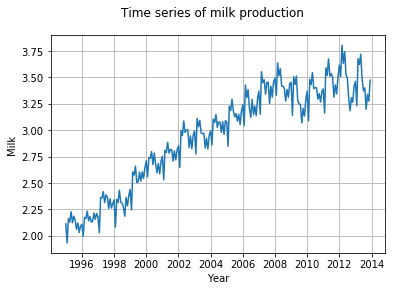

In [30]:
fig,ax = plt.subplots()
ax.plot(df.Date, df.MilkProd)
ax.grid(True)
ax.set_xlabel("Year")
ax.set_ylabel("Milk")
fig.suptitle("Time series of milk production");

For most of the time period shown, the production of milk increased year over year. However, there is a decline in milk production starting in 2009 as a results of the recession. Also, notice that this time series exhibits a strong seasonal component with an annual cycle.

Since the time series has both a visible trend and a seasonality it is clearly a non-stationary series.

# Statistical Properties of the Time Series

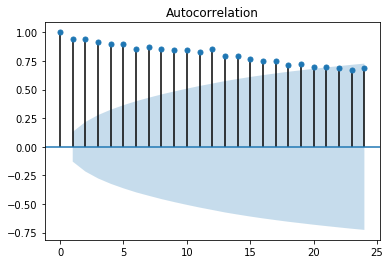

In [32]:
import statsmodels.graphics.tsaplots as sm_pl
sm_pl.plot_acf(df.MilkProd, lags=24);

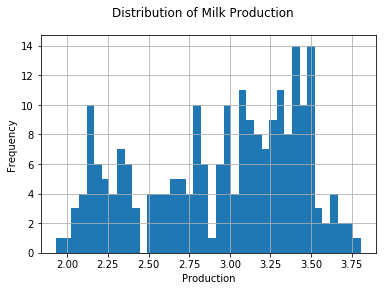

In [33]:
fig,ax = plt.subplots()
ax.hist(df.MilkProd, bins=40)
ax.grid(True)
ax.set_xlabel("Production")
ax.set_ylabel("Frequency")
fig.suptitle("Distribution of Milk Production");

# Stationarity: are mean and standard deviation constant over time?

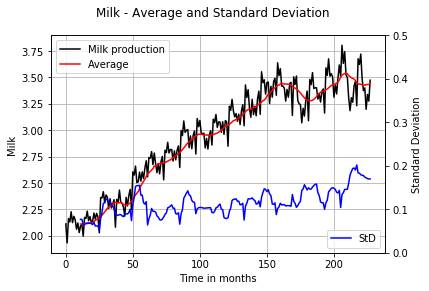

In [34]:
rollingMean = df.MilkProd.rolling(window=12).mean()
rollingStd = df.MilkProd.rolling(window=12).std()
 
fig,ax1 = plt.subplots()
ax1.plot(df.MilkProd, color="black", label="Milk production")
ax1.plot(rollingMean, color="red", label="Average")
ax1.grid(True)
ax1.set_xlabel("Time in months")
ax1.set_ylabel("Milk")
ax1.legend(loc="upper left")
 
ax2 = ax1.twinx() # Create a twin Axes sharing the xaxis
ax2.plot(rollingStd, color = "blue", label = "StD")
ax2.set_ylabel("Standard Deviation")
ax2.legend(loc="lower right")
ax2.set_ylim(0,0.5)
fig.suptitle("Milk - Average and Standard Deviation");

# Decomposition of the Time Series

# Trend

In [35]:
import numpy as np
def movingAverage(values, order):
    end = len(values)
    out = np.zeros(len(values))
 
    out[0] = values[1]
    for i in range(1,end):
        if (i - order <= 1):
            j = 1
        else:
            j += 1
        out[i] = sum(values[j-1:i]) / (i-j+1)
 
    return out

One of the best ways to make a series stationary on variance is through transforming the original series through log transform. We go back to our original data series and add a new column, the logarithm of the milk production:

In [36]:
df['LogMilk'] = pd.Series(np.log(df.MilkProd), index = df.index)

In [38]:
trendM = movingAverage(df.LogMilk, 12)

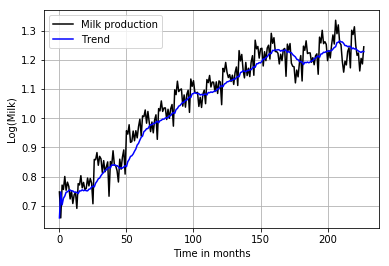

In [39]:
fig,ax = plt.subplots()
ax.plot(df.LogMilk, color="black", label="Milk production")
ax.plot(trendM, color="blue", label="Trend")

ax.grid(True)
ax.set_xlabel("Time in months")
ax.set_ylabel("Log(Milk)")
ax.legend(loc="upper left")

# Get the Trend with Lowess

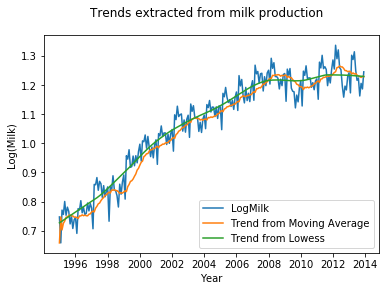

In [42]:
import statsmodels.nonparametric.smoothers_lowess as sm
 
trendL = sm.lowess(df.LogMilk, df.Date, frac=0.25,return_sorted=False)
 
fig,ax = plt.subplots()
ax.plot(df.Date, df.LogMilk)
ax.plot(df.Date, trendM, label='Trend from Moving Average')
ax.plot(df.Date, trendL, label="Trend from Lowess")
ax.set_xlabel("Year")
ax.set_ylabel("Log(Milk)")
ax.legend(loc="lower right")
fig.suptitle("Trends extracted from milk production");

In [44]:
monthsOHE = pd.get_dummies(df.Date)

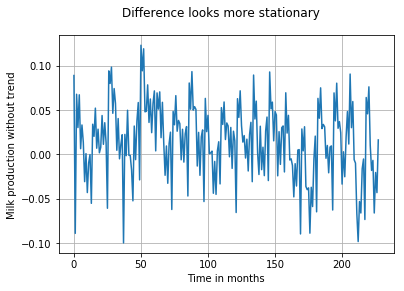

In [47]:
prodWithoutTrend = df.LogMilk - trendM
fig,ax = plt.subplots()
ax.plot(prodWithoutTrend)
 
ax.grid(True)
ax.set_xlabel("Time in months")
ax.set_ylabel("Milk production without trend")
 
fig.suptitle("Difference looks more stationary");

In [48]:
    # a new tmp data frame for decomposition
decX = pd.DataFrame({'LogMilkNoTrend': prodWithoutTrend})
decX = decX.join(monthsOHE)

In [49]:
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept = False)
 
model.fit(monthsOHE, decX.LogMilkNoTrend)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [50]:
model.coef_

array([ 0.08907963, -0.08907963,  0.06793817,  0.03038037,  0.06731869,
        0.00650067,  0.03327418,  0.01376031, -0.03068099,  0.0009393 ,
       -0.04300651, -0.0094902 , -0.00012787, -0.05518676,  0.03412216,
        0.02046707,  0.05228133,  0.00704271,  0.02853812,  0.00187625,
        0.00805665,  0.04394031,  0.01143671,  0.03582014,  0.01326613,
       -0.06073198,  0.09431579,  0.08012587,  0.09855416,  0.04646384,
        0.07436364,  0.05764775,  0.00469884,  0.04053499, -0.0049198 ,
        0.01095231,  0.02224418, -0.09984554,  0.02263395, -0.00138643,
        0.04989665, -0.000921  , -0.00112942, -0.0175573 , -0.05236188,
        0.03207621, -0.00586177,  0.03800607,  0.05861608, -0.02868002,
        0.12326811,  0.09440926,  0.11927979,  0.0481295 ,  0.0487087 ,
        0.07855175,  0.0361494 ,  0.06260302,  0.02459715,  0.05756532,
        0.07174345,  0.0040322 ,  0.06946489,  0.0511868 ,  0.07064452,
        0.01893717,  0.05886126,  0.01299169, -0.02350925,  0.00

In [52]:
seasonalM = model.predict(monthsOHE)

# Residuals
If we remove the seasonality from the difference between milk production and the trend, we will get the residuals or remainders:

In [53]:
remainderM = prodWithoutTrend - seasonalM

In [54]:
  # a data frame with all decompositions
decomposed = pd.DataFrame({'t': trendM, 's': seasonalM, 'r': remainderM})
decomposed.head()

,t,s,r
0,0.658556,0.089080,0.0
1,0.747635,-0.089080,0.0
2,0.703096,0.067938,0.0
3,0.725742,0.030380,0.0
4,0.733337,0.067319,0.0


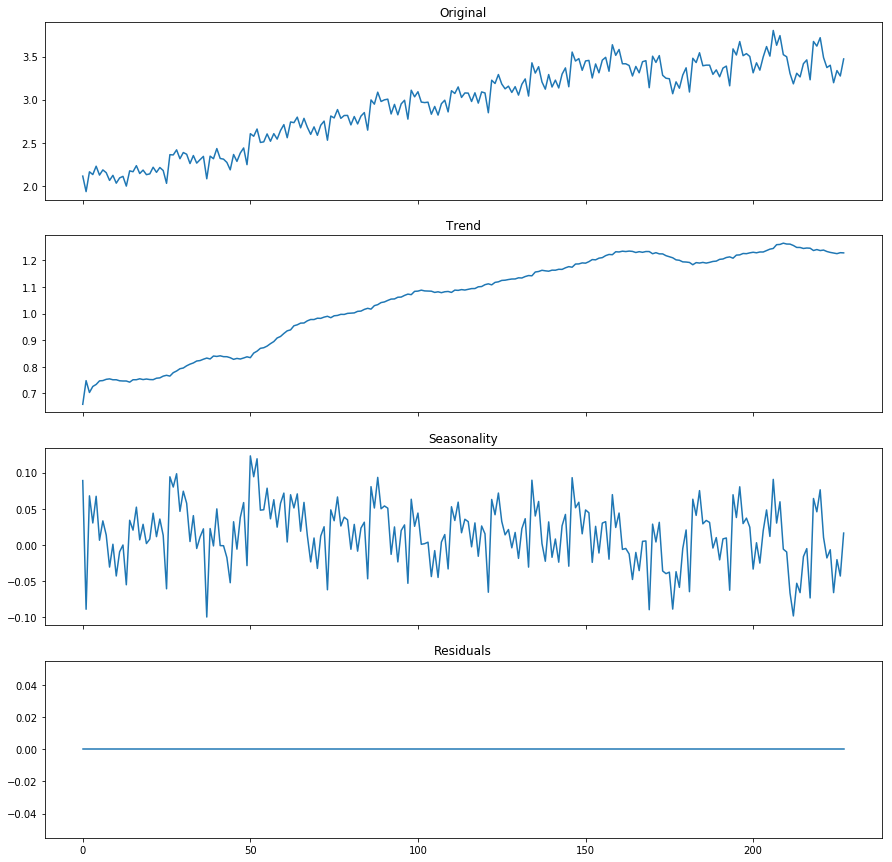

In [56]:
fig,ax = plt.subplots(4, sharex=True, figsize=(15,15))
ax[0].plot(df.MilkProd)
ax[0].set_title('Original')
 
ax[1].plot(decomposed.t)
ax[1].set_title('Trend')
 
ax[2].plot(decomposed.s)
ax[2].set_title('Seasonality')
 
ax[3].plot(decomposed.r)
ax[3].set_title('Residuals');

# Decomposing using statsmodels

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
 
# need to pass the time series as array (values) because of error
# in statsmodels, should be fixed in next version 0.9
decomposition = seasonal_decompose(df.MilkProd.values, freq=12)
 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


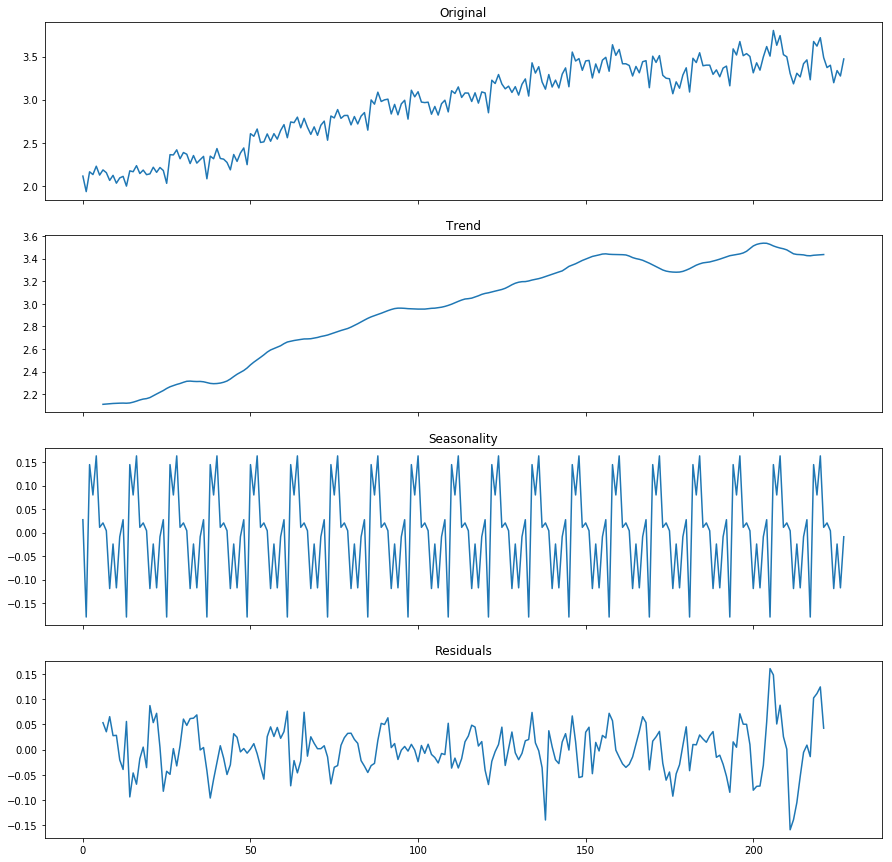

In [59]:
fig,ax = plt.subplots(4, sharex=True, figsize=(15,15))
ax[0].plot(df.MilkProd)
ax[0].set_title('Original')
 
ax[1].plot(trend)
ax[1].set_title('Trend')
 
ax[2].plot(seasonal)
ax[2].set_title('Seasonality')
 
ax[3].plot(residual)
ax[3].set_title('Residuals');

# Is now stationary?
The question remains, is the remainder from this decomposition stationary? To find out, we plot its ACF:

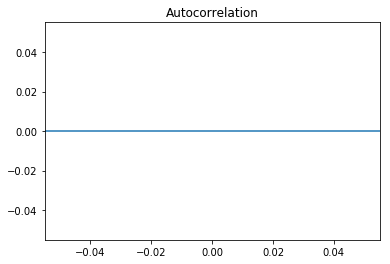

In [61]:
sm_pl.plot_acf(decomposed.r, lags=24);

In [ ]:
Now we plot the histogram of the remainder:

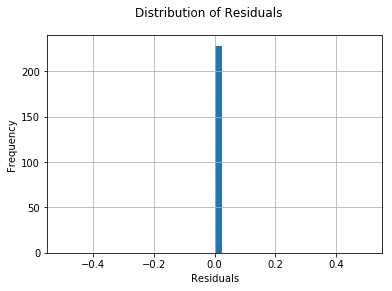

In [64]:
fig,ax = plt.subplots()
ax.hist(decomposed.r, bins=40)
ax.grid(True)
ax.set_xlabel("Residuals")
ax.set_ylabel("Frequency")
fig.suptitle("Distribution of Residuals");

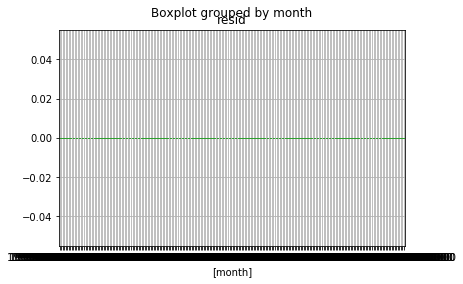

In [66]:
remaindersByMonth = pd.DataFrame({'resid': decomposed.r, 'month': df["Date"]})
 
remaindersByMonth.boxplot(by='month');

# Model a time series
Now that we have explored the decomposition of the time series we will now construct and test Autoregressive Moving Average (ARMA) models for the remainder of the time series.
We will create and test these models in three steps, first creating a moving average (MA) model, then creating an autoregressive (AR) model and finally an autoregressive moving average (ARMA) model.

# Automatic search for the best ARIMA parameters
There are many guidelines and best practices to get the most suitable parameters for an ARIMA model, yet the correct parametrisation of ARIMA models can be a painstaking manual process that requires domain expertise and time. Other statistical programming languages such as R provide automated ways to solve this issue, but not yet in Python.
We can solve this issue by writing Python code to programmatically select the optimal parameter values for our ARIMA(p,d,q) time series model.

We would perform a grid search, a sort of hyper-parameter tuning. We can loop through non-trivial values of the ARIMA orders and see which model has the lowest Akaike Information Criterion (AIC).

In [96]:
# split into train and test (last two years) sets
testSize = 24
milkData = df.LogMilk.values
train, test = milkData[0:-testSize], milkData[-testSize:]

In [98]:
history = [df for df in train]
predictions = list()
for t in range(len(test)):
    modelARMA = ARIMA(history, order=(1,0,0))
    resultsARMA = modelARMA.fit(disp=0)
    yhat = resultsARMA.forecast()[0][0] # one step forecast
    predictions.append(yhat)
    history.append(test[t])

C:\Users\ashukla\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\ashukla\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\ashukla\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as a

In [99]:
rmse = np.sqrt(sum((test - predictions)**2)/testSize)
rmse

0.050296027969572145

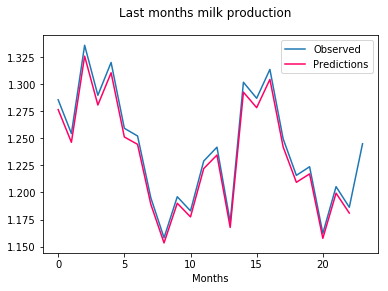

In [100]:
predictions.pop(0) # remove the first element
fig,ax = plt.subplots()
ax.plot(test, label="Observed")
ax.plot(predictions, label='Predictions', color='#ff0066');
 
ax.set_xlabel("Months")
ax.legend(loc='upper right')
fig.suptitle("Last months milk production");

# Seasonal ARIMA model
The statsmodels package (from version 0.8) includes a function to model a seasonal arima.
We see how it works first using as parameters AR=1 and MA=0, plus the difference set to 1 to indicate that we want a data transformation to remove the trend and seasonality.

In [102]:
import statsmodels.api as sm_sa
firstModel = sm_sa.tsa.statespace.SARIMAX(df.LogMilk.values, order=(1,1,0),
                                      seasonal_order=(1,1,0,12))
results = firstModel.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  228
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 551.412
Date:                            Wed, 29 May 2019   AIC                          -1096.824
Time:                                    20:20:48   BIC                          -1086.712
Sample:                                         0   HQIC                         -1092.738
                                            - 228                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1920      0.068     -2.844      0.004      -0.324      -0.060
ar.S.L12      -0.5304      0.059     -9.044      0.000      -0.645      -0.415
sigma2         0.0003   2.75e-05     12.383      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                      105.52   Jarque-Bera (JB):                 8.24
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               0.82   Skew:                             0.08
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [103]:
 # Define the p and q parameters to take any value between 0 and 3
p = q = range(0, 4)
sp = sq = range(0, 3)
 
  # Generate all different combinations of p, d=1 and q triplets
pdq = [(a,1,b) for a,b in itertools.product(p, q)]
  # Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(a, 1, b, 12) for a,b in list(itertools.product(sp, sq))]


In [106]:
bestModel = sm_sa.tsa.statespace.SARIMAX(df.LogMilk.values, order=(1,1,1),
                                      seasonal_order=(2,1,1,12))
results = bestModel.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  228
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                 580.393
Date:                            Wed, 29 May 2019   AIC                          -1148.786
Time:                                    20:22:26   BIC                          -1128.562
Sample:                                         0   HQIC                         -1140.614
                                            - 228                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5427      0.279      1.942      0.052      -0.005       1.090
ma.L1         -0.6859      0.245     -2.802      0.005      -1.166      -0.206
ar.S.L12      -0.1931      0.133     -1.448      0.148      -0.455       0.068
ar.S.L24      -0.1692      0.096     -1.765      0.078      -0.357       0.019
ma.S.L12      -0.7016      0.098     -7.172      0.000      -0.893      -0.510
sigma2         0.0002   1.77e-05     13.993      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       45.63   Jarque-Bera (JB):                28.18
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.02
Prob(H) (two-sided):                  0.44   Kurtosis:                         4.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

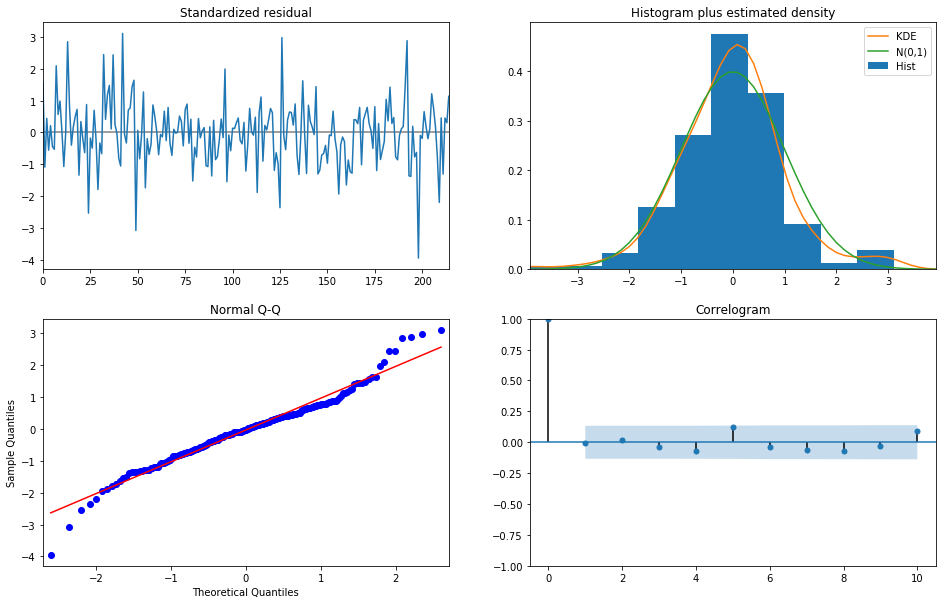

In [107]:
results.plot_diagnostics(figsize=(16, 10));

# Forecast
It is easy to forecast values using the previously fitted model.
The get_prediction and conf_int methods calculate predictions for future points in time for the previously fitted model and the confidence intervals associated with a prediction, respectively.

the last 12 months

In [108]:
HISTORIC =df.shape[0]
PRED = 12

In [109]:
last12m = results.get_prediction(start=HISTORIC-PRED+1,
                                 end=HISTORIC,
                                 dynamic=False, full_results=True)


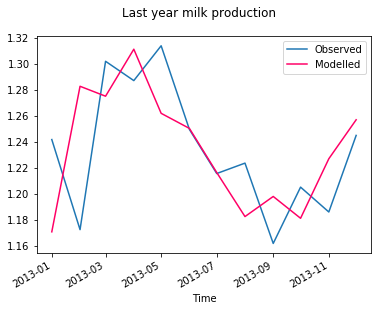

In [111]:
fig,ax = plt.subplots()
ax.plot(df.Date[-PRED:], df.LogMilk[-PRED:], label="Observed")
ax.plot(df.Date[-PRED:], last12m.predicted_mean, label='Modelled', color='#ff0066');
  # avoid overlapping of ticks on x ax
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
 
ax.set_xlabel("Time")
ax.legend(loc='upper right')
fig.suptitle("Last year milk production");

In [112]:
rmse = ((last12m.predicted_mean - df.LogMilk[-PRED:]) ** 2).mean()
rmse

0.0022007246056385092

In [ ]:
Both the plot and the RMSE are quite good.

Summary:
    The original time series of milk production is show in blue in the plot above. The forecast is show in red. The 95 percent confidence intervals are shown in lighter shades of red.

It is obvious that, the further we try to extrapolate the time series evolution into the future, the less confident our prediction becomes. Hence, the confidence bound widens in the course of time.